# Question 1.2 PCA

In [1]:
import sys
print(sys.version)

3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

import pandas as pd
import seaborn as sns

In [3]:
import sys
sys.path.append('../code/')

In [4]:
from pca import Pca

In [5]:
from classification_base import MNIST_PATH
from mnist_helpers import mnist_training, mnist_testing

In [6]:
train_X, train_y = mnist_training(shuffled=True)
#test_X, test_y = mnist_testing(shuffled=True)

## Calculate Sigma

In [7]:
toy = np.array([[1., 2, 3], [0, 1., 2], [2, 1, 0], [0, 2, 1]])

In [8]:
mean = toy.sum(axis=0)/toy.shape[0]
mean

array([ 0.75,  1.5 ,  1.5 ])

In [9]:
toy

array([[ 1.,  2.,  3.],
       [ 0.,  1.,  2.],
       [ 2.,  1.,  0.],
       [ 0.,  2.,  1.]])

In [10]:
toy - mean

array([[ 0.25,  0.5 ,  1.5 ],
       [-0.75, -0.5 ,  0.5 ],
       [ 1.25, -0.5 , -1.5 ],
       [-0.75,  0.5 , -0.5 ]])

In [11]:
t = Pca(toy, 2, verbose=True)

In [12]:
t.calc_eigen_stuff()

Iterate over x_i in X to get Sigma: Wed Nov  9 20:00:36 2016
xi: [[ 0.25  0.5   1.5 ]]
dot_prod: [[ 0.0625  0.125   0.375 ]
 [ 0.125   0.25    0.75  ]
 [ 0.375   0.75    2.25  ]]
sigma: 
[[ 0.0625  0.125   0.375 ]
 [ 0.125   0.25    0.75  ]
 [ 0.375   0.75    2.25  ]]
xi: [[-0.75 -0.5   0.5 ]]
dot_prod: [[ 0.5625  0.375  -0.375 ]
 [ 0.375   0.25   -0.25  ]
 [-0.375  -0.25    0.25  ]]
sigma: 
[[ 0.625  0.5    0.   ]
 [ 0.5    0.5    0.5  ]
 [ 0.     0.5    2.5  ]]
xi: [[ 1.25 -0.5  -1.5 ]]
dot_prod: [[ 1.5625 -0.625  -1.875 ]
 [-0.625   0.25    0.75  ]
 [-1.875   0.75    2.25  ]]
sigma: 
[[ 2.1875 -0.125  -1.875 ]
 [-0.125   0.75    1.25  ]
 [-1.875   1.25    4.75  ]]
xi: [[-0.75  0.5  -0.5 ]]
dot_prod: [[ 0.5625 -0.375   0.375 ]
 [-0.375   0.25   -0.25  ]
 [ 0.375  -0.25    0.25  ]]
sigma: 
[[ 2.75 -0.5  -1.5 ]
 [-0.5   1.    1.  ]
 [-1.5   1.    5.  ]]
sigma before dividing by N = 4
[[ 2.75 -0.5  -1.5 ]
 [-0.5   1.    1.  ]
 [-1.5   1.    5.  ]]
sigma after dividing by N = 4
[[ 0.6875

Check with sklearn

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(toy)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Compare Sigma, the covariance matrix: **

In [14]:
t.sigma

array([[ 0.6875, -0.125 , -0.375 ],
       [-0.125 ,  0.25  ,  0.25  ],
       [-0.375 ,  0.25  ,  1.25  ]])

In [15]:
pca.get_covariance().T

array([[ 0.6875, -0.125 , -0.375 ],
       [-0.125 ,  0.25  ,  0.25  ],
       [-0.375 ,  0.25  ,  1.25  ]])

**Compare the eigenvectors: **

Note that SKLearn transposes theirs.

In [16]:
# components_ : array, [n_components, n_features]
# Principal axes in feature space, representing the directions of 
# maximum variance in the data. The components are sorted by 
# explained_variance_.
pca.components_

array([[  4.36435780e-01,  -2.18217890e-01,  -8.72871561e-01],
       [  8.94427191e-01,  -3.17418279e-16,   4.47213595e-01],
       [ -9.75900073e-02,  -9.75900073e-01,   1.95180015e-01]])

In [17]:
np.set_printoptions(suppress=True)

In [18]:
pca.components_

array([[ 0.43643578, -0.21821789, -0.87287156],
       [ 0.89442719, -0.        ,  0.4472136 ],
       [-0.09759001, -0.97590007,  0.19518001]])

In [19]:
t.eigenvects

array([[-0.43643578,  0.89442719, -0.09759001],
       [ 0.21821789, -0.        , -0.97590007],
       [ 0.87287156,  0.4472136 ,  0.19518001]])

**Compare the eigenvalues: **

In [20]:
t.eigenvals

array([ 1.5   ,  0.5   ,  0.1875])

In [21]:
pca.explained_variance_

array([ 1.5   ,  0.5   ,  0.1875])

## Run on the real MNIST data

In [22]:
X_num = train_X.shape[0]
train = Pca(train_X[:, 0:X_num], dimensions=50)

In [23]:
train.calc_eigen_stuff()

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [24]:
train.eigenvals[0:10]

array([ 332719.12203544,  243279.88433819,  211503.84193548,
        184773.30625576,  166924.0491968 ,  147842.49759263,
        112176.33307507,   98872.78171993,   94694.67078222,
         80808.47770154])

In [25]:
train.sigma

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
train.sum_of_top_eigenvalues()

2827256.7724916795

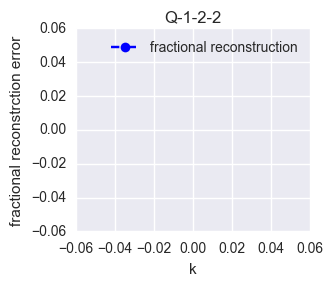

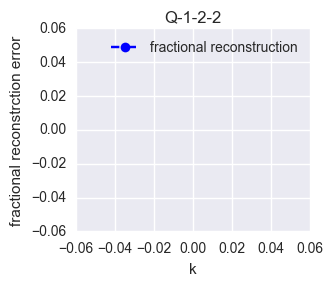

In [27]:
train.plot_fractional_reconstruction_error()

In [28]:
train.fractional_reconstruction_df.head(5)

,fractional reconstruction,k
0,0.902953,1
0,0.831994,2
0,0.770303,3
0,0.716409,4
0,0.667721,5


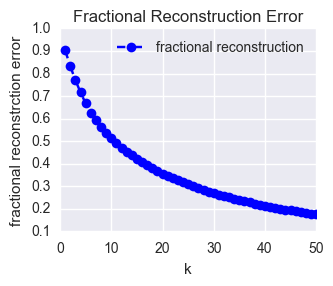

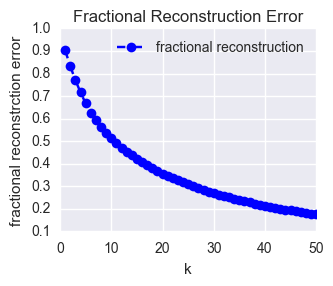

In [29]:
train.plot_fractional_reconstruction_error(start=0, stop=50, title ='Fractional Reconstruction Error')

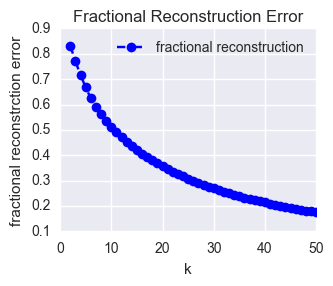

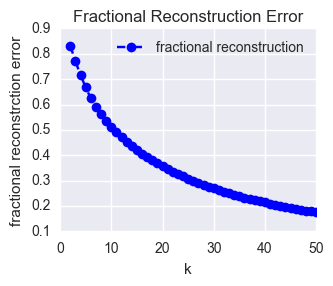

In [30]:
train.plot_fractional_reconstruction_error(start=2, stop=50, 
                                           title ='Fractional Reconstruction Error')

In [31]:
len(train.eigenvals[0:50])

50

In [32]:
np.sum(train.eigenvals[0:50])

2827256.7724916795

In [33]:
np.round(train.eigenvals.copy(),1)[0:50]

array([ 332719.1,  243279.9,  211503.8,  184773.3,  166924. ,  147842.5,
        112176.3,   98872.8,   94694.7,   80808.5,   72312.4,   69357.1,
         58825.9,   58013.1,   54122.9,   50842.2,   45411.8,   43777.7,
         40704.7,   39519.1,   36552.9,   34514.6,   32692.7,   31286.1,
         30287. ,   28775.6,   27858.8,   26960.1,   25532.8,   23685.7,
         22562.4,   22221.4,   20660.3,   20110.7,   19542.9,   18638. ,
         17340.6,   16726. ,   16505.5,   16191.4,   15659.3,   15251. ,
         14348.1,   13652.6,   13198.6,   12860.2,   12411.3,   12054.1,
         11658.7,   11035.3])

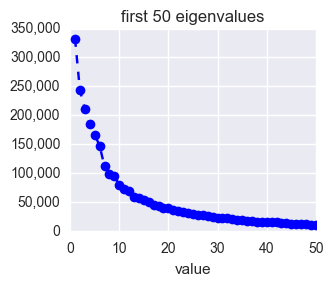

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3))
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plot_x = range(1, 51)
plot_y = np.round(train.eigenvals.copy(),1)[0:50]
#plot_data = pd.DataFrame({'eigenvalue':np.round(train.eigenvals.copy(),1)[0:50], 
#              'number': range(1,50+1)}).plot.scatter(x='number', y='eigenvalue')
plt.plot(plot_x, plot_y, linestyle='--', marker='o', color='b')
plt.title('first 50 eigenvalues')
plt.xlabel('eigenvalue')
plt.xlabel('value')
plt.tight_layout()
fig.savefig('../figures/Q-1-2-1_first_50_eigenvalues.pdf')


In [35]:
np.save("./data/Q-1-2_sigma.npy", train.sigma)

In [36]:
np.save("./data/Q-1-2_eigenvalues.npy", train.eigenvals)

In [37]:
np.save("./data/Q-1-2_eigenvectors.npy", train.eigenvects)

### Compare to sklearn

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)